In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

In [102]:
conn = sqlite3.connect("database.db")
cursor = conn.cursor()

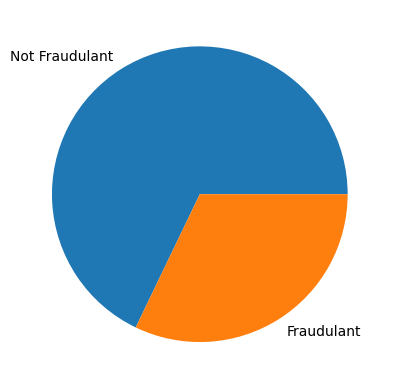

In [103]:
# Display number of fraudulant transactions to valid transactions
query = '''SELECT Fraud_Label, COUNT(*) AS count FROM transactions GROUP BY Fraud_Label'''
cursor.execute(query)
output = cursor.fetchall()
labels, y = zip(*output)
plt.pie(y, labels=list(map(lambda x: "Fraudulant" if x==1 else "Not Fraudulant", labels)))
plt.show()

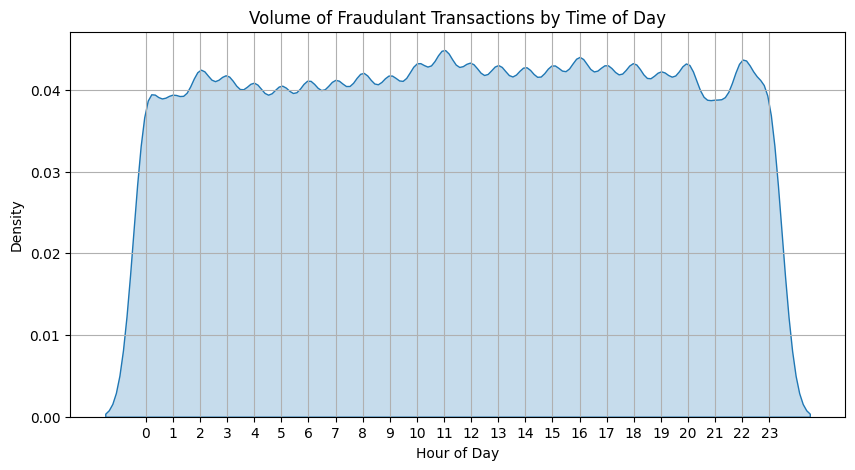

In [104]:
# Display time of fraudulant transactions
query = '''SELECT Timestamp, COUNT(*) AS count FROM transactions WHERE Fraud_Label=1 GROUP BY Timestamp'''
cursor.execute(query)
output = cursor.fetchall()

df = pd.DataFrame(output, columns=["Datetime", "Value"])
df["Datetime"] = pd.to_datetime(df["Datetime"])

df["Time_of_Day"] = df["Datetime"].dt.time
df["Hour"] = df["Datetime"].dt.hour
hourly_counts = df.groupby("Hour")["Value"].count().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.kdeplot(df["Hour"], fill=True, bw_adjust=0.5)
plt.title("Volume of Fraudulant Transactions by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Density")
plt.xticks(range(24)) 
plt.grid()
plt.show()


In [105]:
conn.commit()
conn.close()